In [6]:
# Basic Libraries
import pandas as pd
import numpy as np
# ML Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import cross_validate, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import linear_model, svm, gaussian_process
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from IPython.display import display, HTML
from IPython.display import Math, Latex

In [38]:
price_data = pd.read_csv("/Users/luckyhu/Desktop/UCSC/2021_Winter/Introduction_to_ML/Final_Project/sample_submission.csv")
train_data = pd.read_csv("/Users/luckyhu/Desktop/UCSC/2021_Winter/Introduction_to_ML/Final_Project/train.csv")
test_data = pd.read_csv("/Users/luckyhu/Desktop/UCSC/2021_Winter/Introduction_to_ML/Final_Project/test.csv")

print(train_data.head(5))


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [9]:
train_data.info()
print("train data:", train_data.shape)
print('teast data:', test_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [75]:
def get_cols_with_missing_values(DataFrame):
    missing_na_columns=(DataFrame.isnull().sum())
    return missing_na_columns[missing_na_columns > 0]

train_feature_with_na = get_cols_with_missing_values(train_data)
print('columns of missing values in train data:')
print(train_feature_with_na)
print()
test_feature_with_na = get_cols_with_missing_values(test_data)
print('columns of missing values in test data:')
print(test_feature_with_na)

columns of missing values in train data:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

columns of missing values in test data:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
Ga

In [76]:
def checkNull_fillData(df):
    for col in df.columns:
        if len(df.loc[df[col].isnull() == True]) != 0:
            if df[col].dtype == "float64" or df[col].dtype == "int64":
                df.loc[df[col].isnull() == True,col] = df[col].median()
            else:
                df.loc[df[col].isnull() == True,col] = "Missing"
                
print(checkNull_fillData(train_data))
print(checkNull_fillData(test_data))

None
None


In [77]:
train_cols=[]
for col in train_data.columns:
    if train_data[col].dtype == "float64" or train_data[col].dtype == "int64":
        train_cols.append(col)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
train_cols =['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
X1 = train_data[train_cols]
y1 = train_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X1, y1)

<Figure size 1800x1080 with 0 Axes>

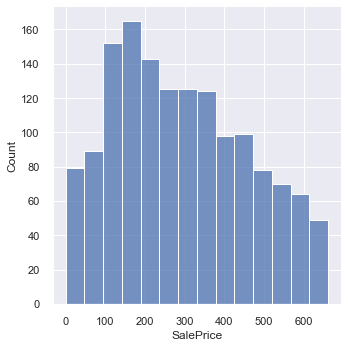

In [66]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
plt.figure(figsize = (25,15),facecolor='white', edgecolor='white')
sns.displot(y1)

In [85]:
from sklearn import metrics
X1 = train_data[train_cols].values
y1 = train_data['SalePrice'].values
X1_scaled = preprocessing.StandardScaler().fit_transform(X1)
y1_scaled = preprocessing.StandardScaler().fit_transform(y1.reshape(-1,1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1_scaled, test_size=0.20) 

forest_model = RandomForestRegressor(n_estimators=20)
forest_model.fit(X1_train, y1_train )
predicted_random_forest = forest_model.predict(X1_test)
print("Mean Absolute Error using Random Forest:", metrics.mean_absolute_error(y1_test, predicted_random_forest))
print('Mean Squared Error using Random Forest:', metrics.mean_absolute_error(y1_test, predicted_random_forest))
print('Root Mean Squared Error using Random Forest:', np.sqrt(metrics.mean_squared_error(y1_test, predicted_random_forest)))

Mean Absolute Error using Random Forest: 0.2928530061357542
Mean Squared Error using Random Forest: 0.2928530061357542
Root Mean Squared Error using Random Forest: 0.42948153506941056


/var/folders/bh/t8_dpm0n3d7d59v6ry1wl0p40000gn/T/ipykernel_45046/2923276005.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X1_train, y1_train )


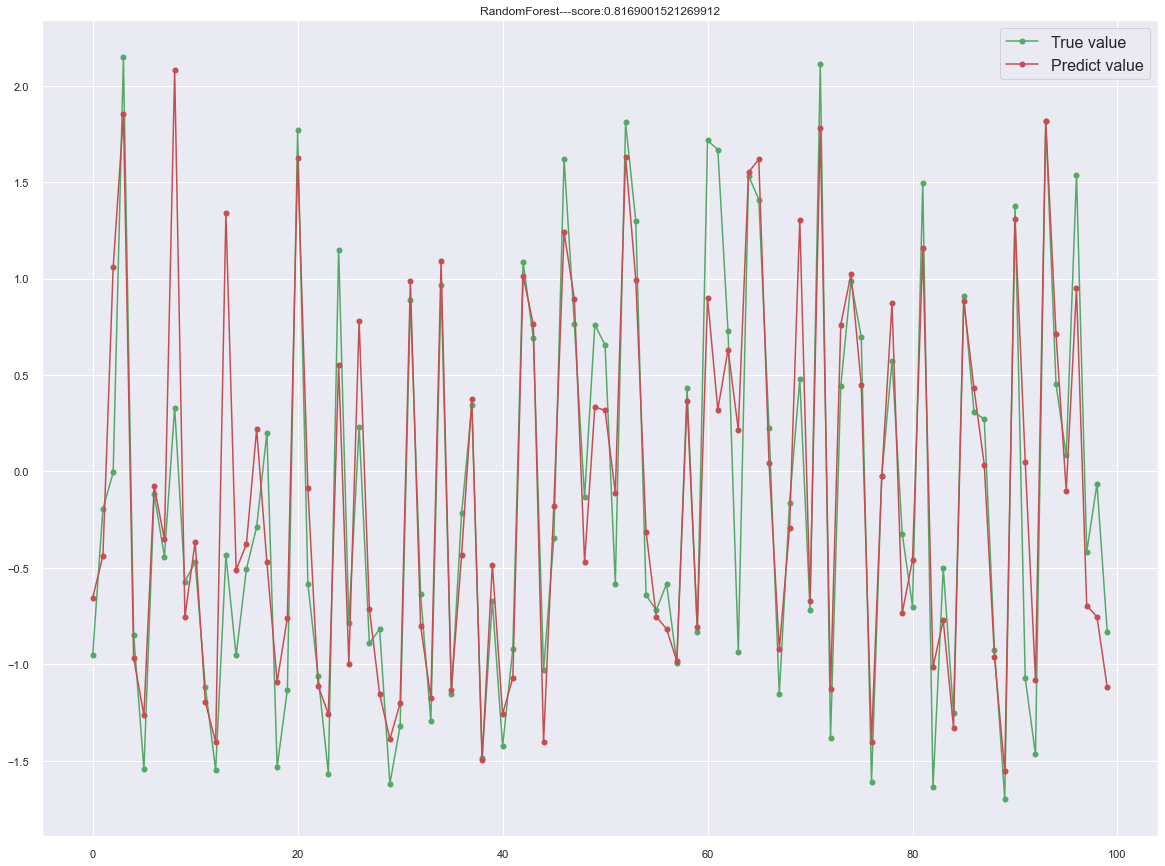

In [86]:
score = forest_model.score(X1_test, y1_test)
plt.figure(figsize = (20,15))
plt.plot(np.arange(100), y1_test[:100], "go-", label="True value")
plt.plot(np.arange(100), predicted_random_forest[:100], "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score}")
plt.legend(loc="best", prop={"size":16})
plt.show()

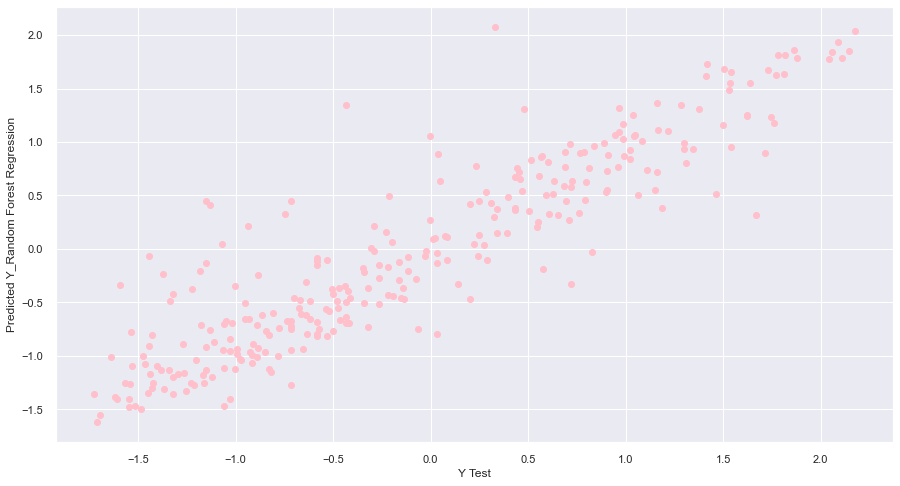

In [87]:
plt.figure(figsize=(15,8))
plt.scatter(y1_test,predicted_random_forest, c='pink')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y_Random Forest Regression')
plt.show()

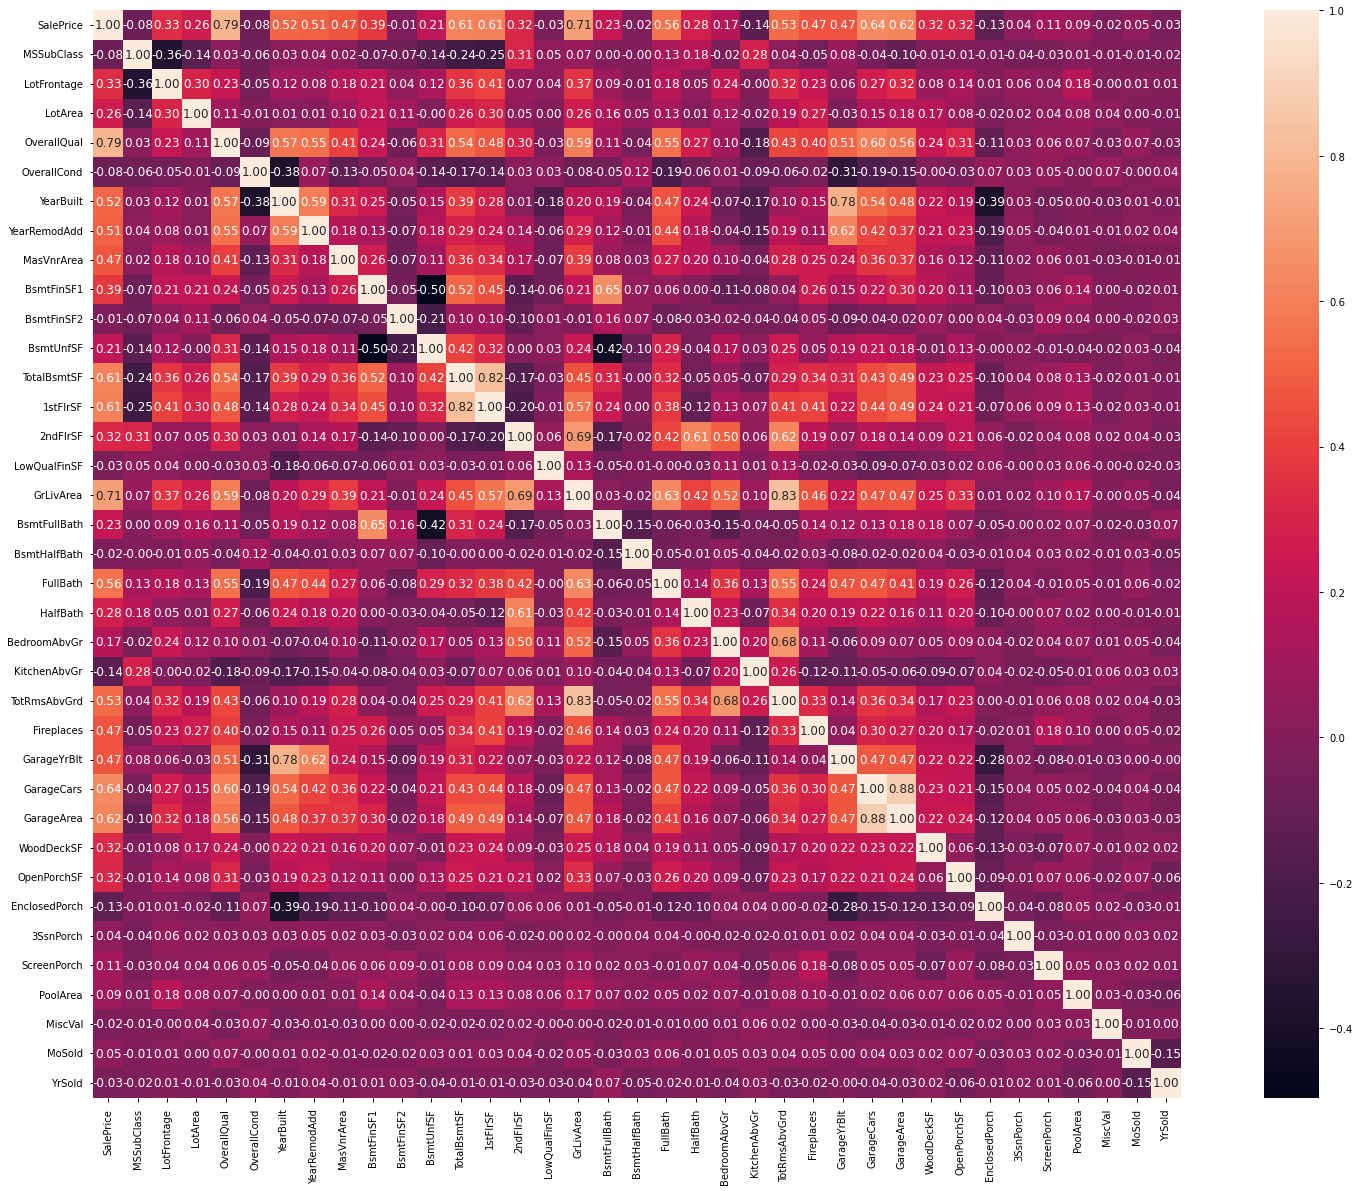

In [19]:
cols =['SalePrice','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
plt.figure(figsize = (30,20))
cm = np.corrcoef(train_data[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols, xticklabels=cols)

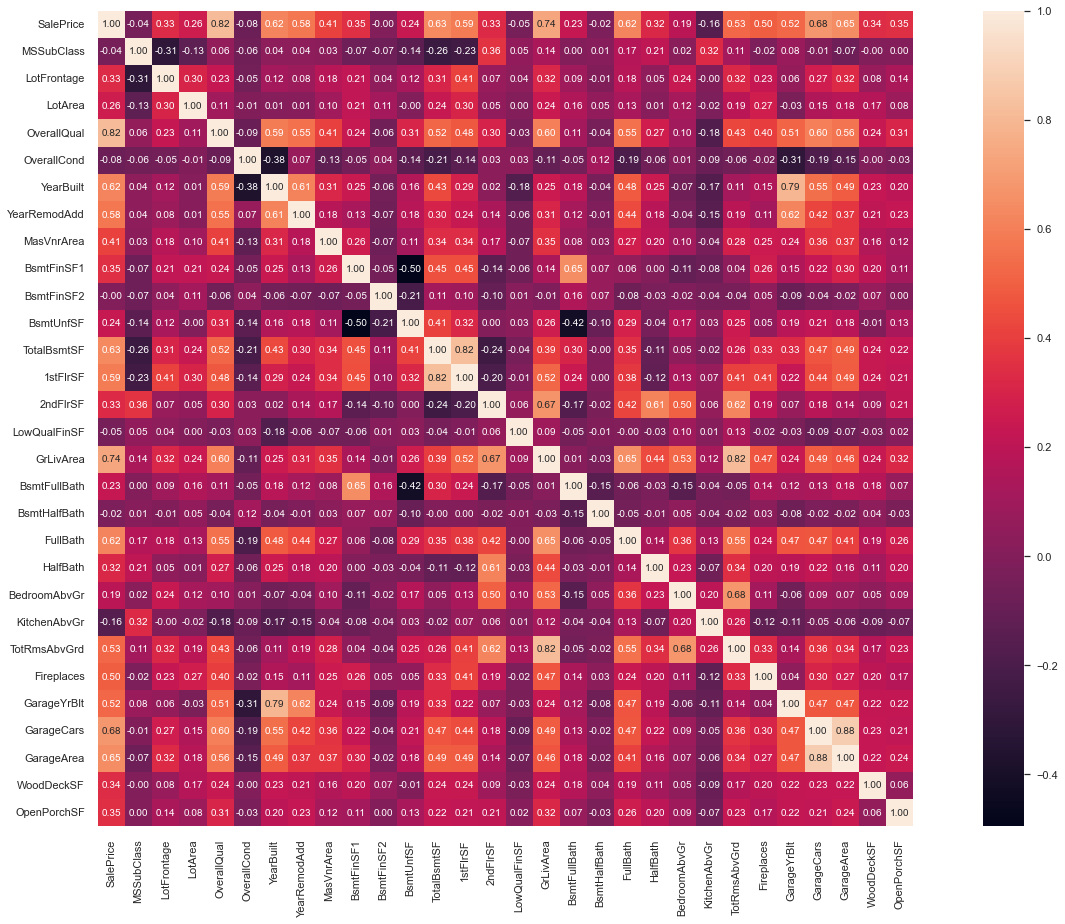

In [80]:
#saleprice correlation matrix
columns =['SalePrice','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
 'GarageArea','WoodDeckSF','OpenPorchSF']
#columns = ['SalePrice', 'MSSubClass', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr']
plt.figure(figsize = (25,15))
cm = np.corrcoef(train_data[columns].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns, xticklabels=columns)

In [114]:
train_columns =['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','FullBath','GarageCars','GarageArea']
X2 = train_data[train_columns]
y2 = train_data['SalePrice']
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2)

In [88]:
from sklearn import metrics
X2 = train_data[train_columns].values
y2 = train_data['SalePrice'].values
X2_scaled = preprocessing.StandardScaler().fit_transform(X2)
y2_scaled = preprocessing.StandardScaler().fit_transform(y2.reshape(-1,1))
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2_scaled, test_size=0.20) 


forest_model = RandomForestRegressor(n_estimators=20)
forest_model.fit(X2_train, y2_train )
predicted_random_forest2 = forest_model.predict(X2_test)
print("Mean Absolute Error using Random Forest:", metrics.mean_absolute_error(y2_test, predicted_random_forest2))
print('Mean Squared Error using Random Forest:', metrics.mean_absolute_error(y2_test, predicted_random_forest2))
print('Root Mean Squared Error using Random Forest:', np.sqrt(metrics.mean_squared_error(y2_test, predicted_random_forest2)))

Mean Absolute Error using Random Forest: 0.27889082305333296
Mean Squared Error using Random Forest: 0.27889082305333296
Root Mean Squared Error using Random Forest: 0.3935495312977085


/var/folders/bh/t8_dpm0n3d7d59v6ry1wl0p40000gn/T/ipykernel_45046/2186055020.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X2_train, y2_train )


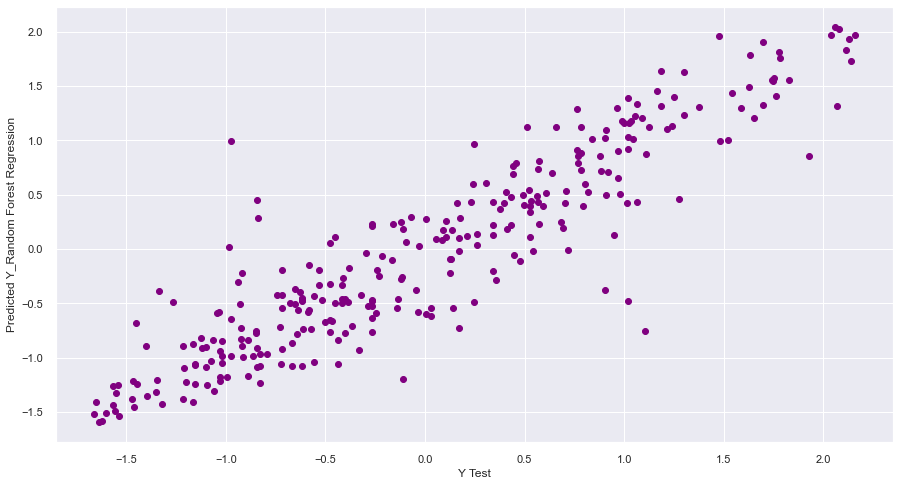

In [115]:
plt.figure(figsize=(15,8))
plt.scatter(y2_test,predicted_random_forest2, c='purple')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y_Random Forest Regression')
plt.show()

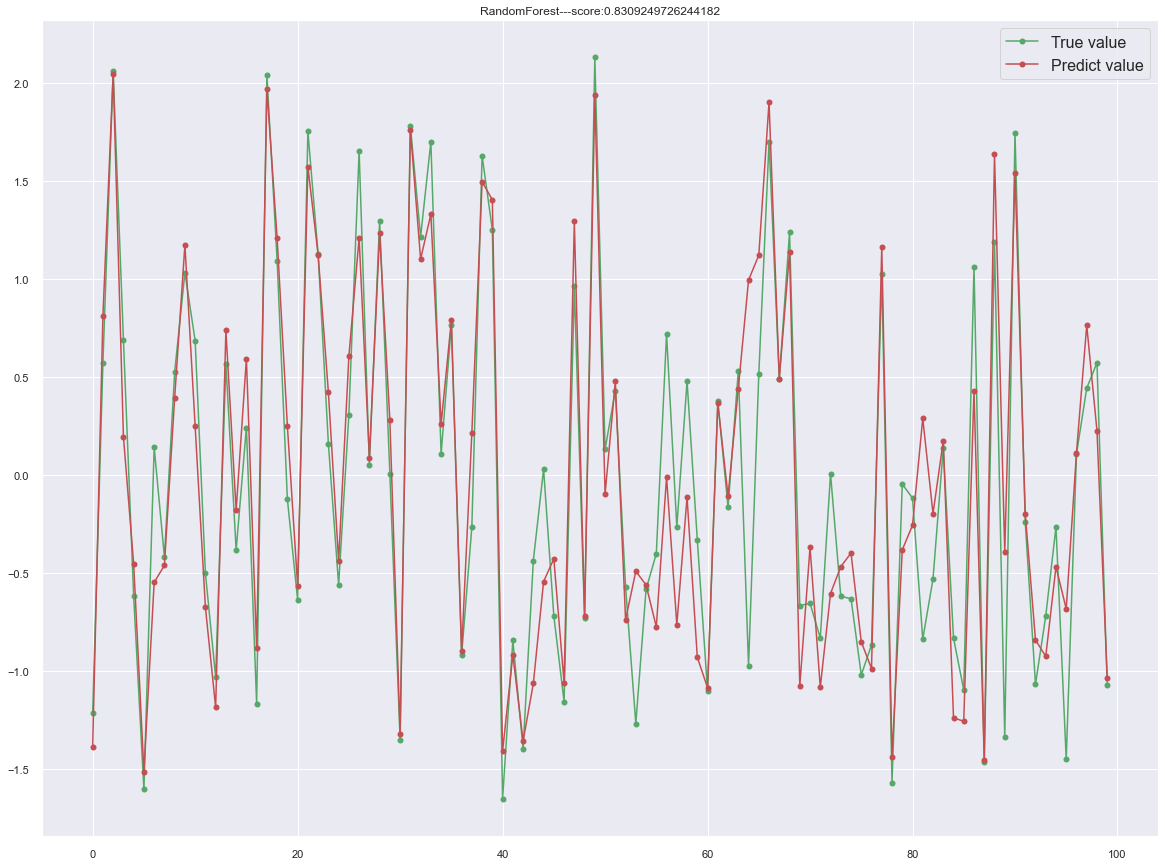

In [116]:
score2 = forest_model.score(X2_test, y2_test)
plt.figure(figsize = (20,15))
plt.plot(np.arange(100), y2_test[:100], "go-", label="True value")
plt.plot(np.arange(100), predicted_random_forest2[:100], "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score2}")
plt.legend(loc="best",prop={"size":16})
plt.show()

# 1 Data exploration
### Filtered the data fields manually at first because the field number of 79 is so many that we can not to process. 

### 1. Firstly, droped the variables which lack a lot of values, include Alley, FireplaceQu, PoolQC, Fence, MiscFeature. 

### 2. Secondly, ignored the variables are related or described in the other one. 
#### (1) Ignored MSZoning, LotFrontage, LotArea, Street, and choose MSSubClass only. Since MSSubClass identifies the general zoning classification of the sale, and it could be seem as a represent of the other mentioned variables.
#### (2) Choose the varible named TotalBsmtSF, which is the total square feet of basement as the representive to other variables related to basement part.

### 3. Kept the variables that take important roles of our dream house and ignored the others that have minor effect. To be more specific, we might not care a lot about the value of miscellaneous feature, number of fireplaces (while there is almost modern heating equipment), or masonry veneer type when we are dreaming our house.

### There were 17 variables after looking over and filtering the variables carefully as below.
#### MSSubClass, LandContour, Utilities, Neighborhood, OverallQual, OverallCond, YearBuilt, YearRemodAdd, TotalBsmtSF, Heating, HeatingQC, GrLivArea, FullBath, HalfBath, BedroomAbvGr, GarageQual, and PoolArea.


### Then we went into some scatter plots between those chosen variables and "SalePrice" to see how the variables work with our expectations.


In [75]:
print(train_data['SalePrice'])

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


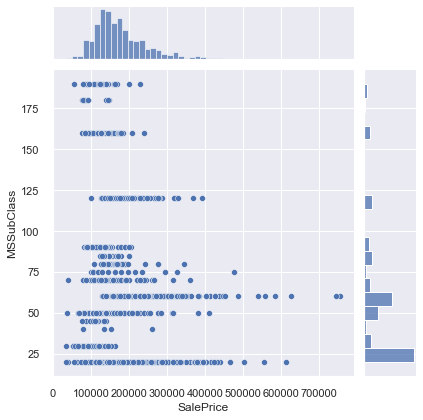

In [76]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['MSSubClass'], kind='scatter')

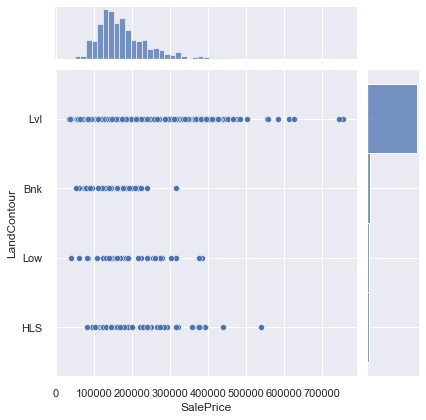

In [77]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['LandContour'], kind='scatter')

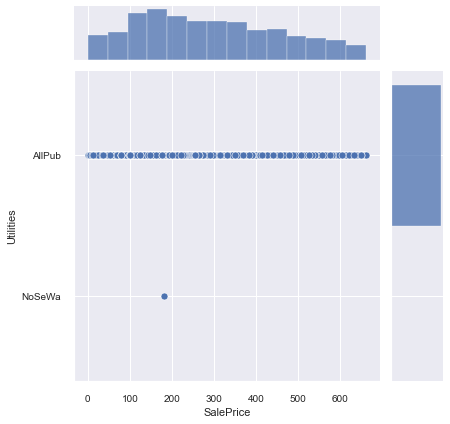

In [194]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['Utilities'], kind='scatter')

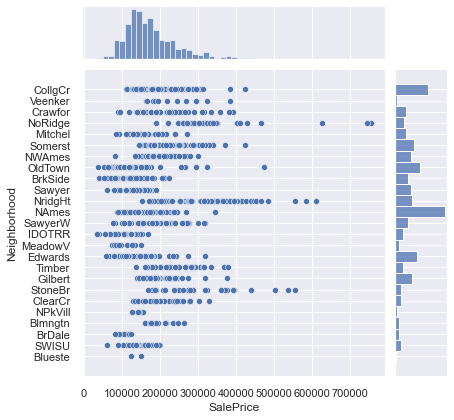

In [79]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['Neighborhood'], kind='scatter')

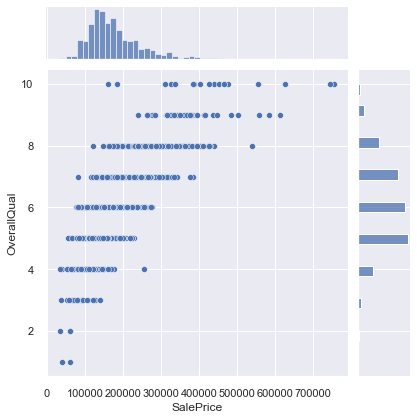

In [80]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['OverallQual'], kind='scatter')

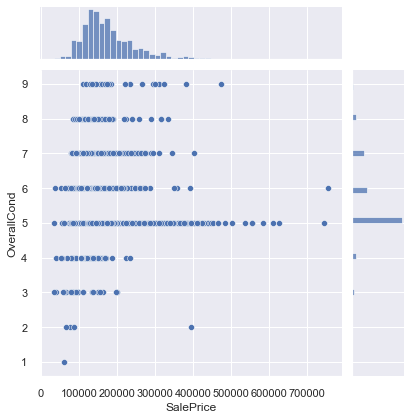

In [81]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['OverallCond'], kind='scatter')

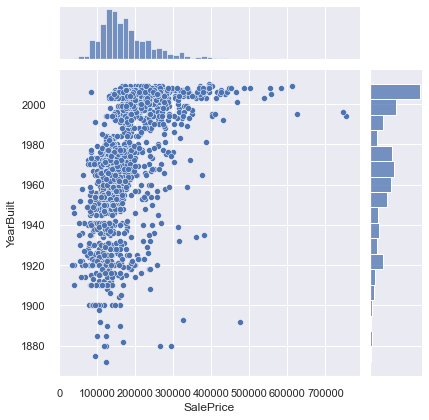

In [82]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['YearBuilt'], kind='scatter')

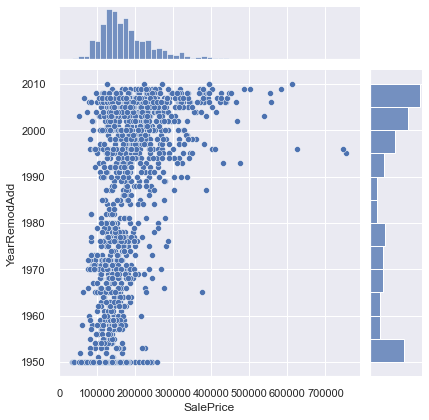

In [83]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['YearRemodAdd'], kind='scatter')

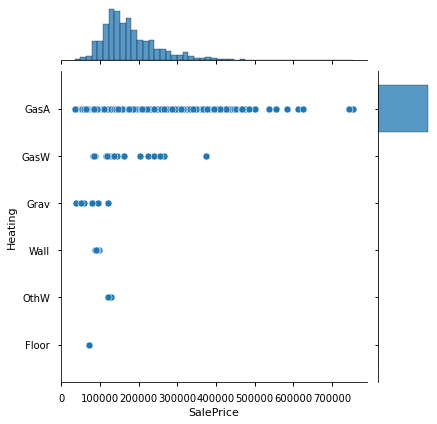

In [29]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['Heating'], kind='scatter')

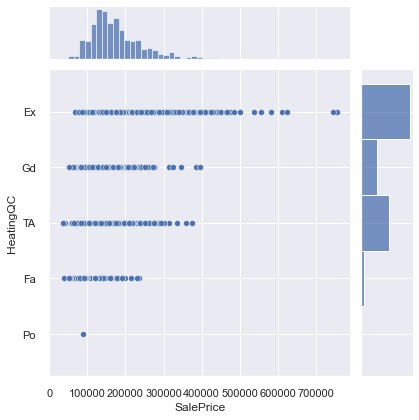

In [87]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['HeatingQC'], kind='scatter')

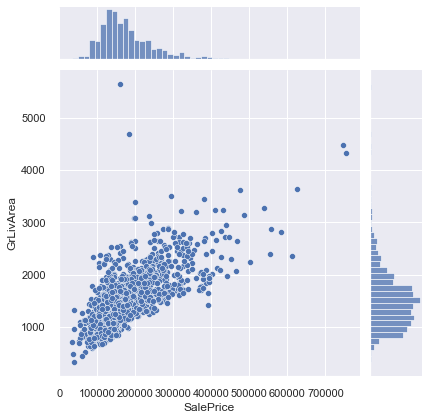

In [88]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['GrLivArea'], kind='scatter')

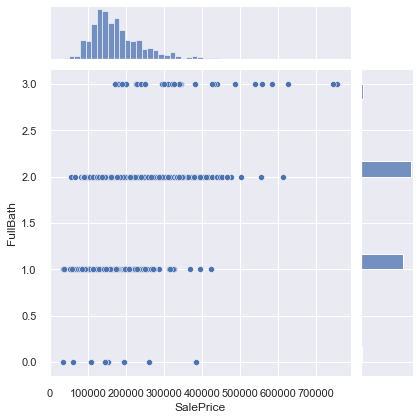

In [89]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['FullBath'], kind='scatter')

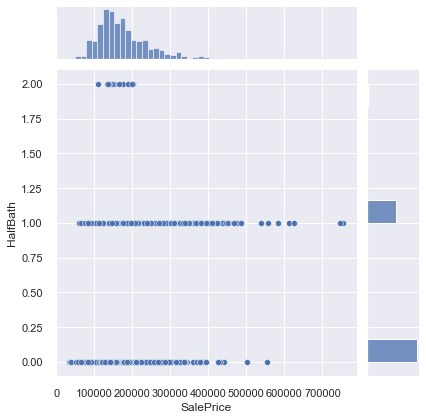

In [90]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['HalfBath'], kind='scatter')

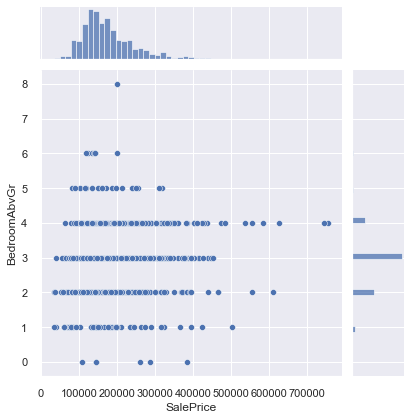

In [91]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['BedroomAbvGr'], kind='scatter')

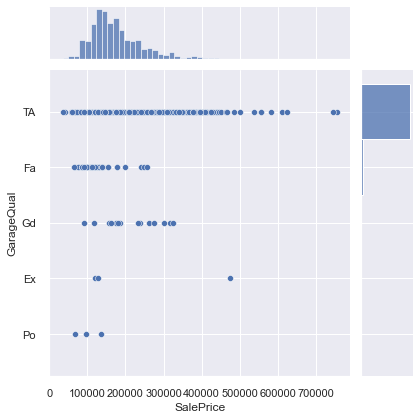

In [92]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['GarageQual'], kind='scatter')

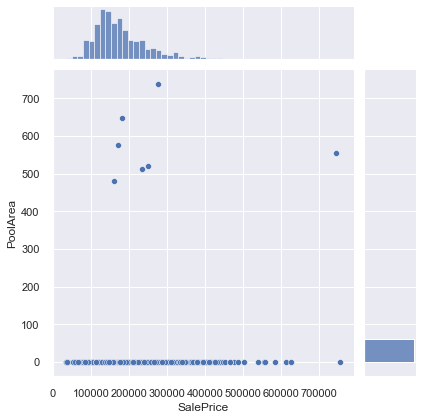

In [93]:
sns.jointplot(x=train_data['SalePrice'], y=train_data['PoolArea'], kind='scatter')

### We could see in the scatter plots, the "SalePrice" did show certain reaction with selected features. We decided to focus on following variables which implied trend in "SalePrice".
#### -MSSubClass
#### -Neighborhood
#### -OverallQual
#### -OverallCond
#### -YearBuilt
#### -YearRemodAdd
#### -TotalBsmtSF
#### -GrLivArea
#### -BedroomAbvGr

# 2 The 'SalePrice' distribution
### Took a look of descriptive statistics that summarize the "SalePrice", and the correlation matrix between "SalePrice" and selected features.

In [39]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/luckyhu/miniforge3/envs/my-conda-env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

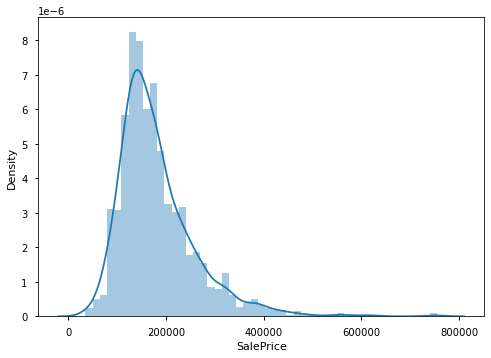

In [40]:
sns.distplot(train_data['SalePrice'])

In [42]:
print(f"Skewness: {train_data['SalePrice'].skew()}")
print(f"Kurtosis: {train_data['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


### Deviate from the normal distribution.
### Have appreciable positive skewness.
#### (Skewness means the curve is shifted to the left or to the right. Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.)
### Show peakedness.
#### (Kurtosis>0)

In [43]:
for col in ['SalePrice', 'MSSubClass', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr']:
    train_data[col] = train_data[col].astype('category').cat.codes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int8   
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   int8   
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int8   
 18  OverallC

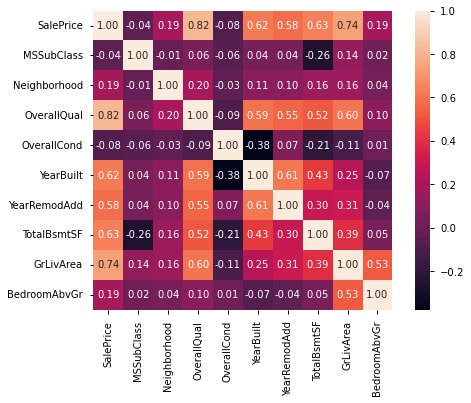

In [44]:
#saleprice correlation matrix
cols = ['SalePrice', 'MSSubClass', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr']
cm = np.corrcoef(train_data[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)

/Users/luckyhu/miniforge3/envs/my-conda-env/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


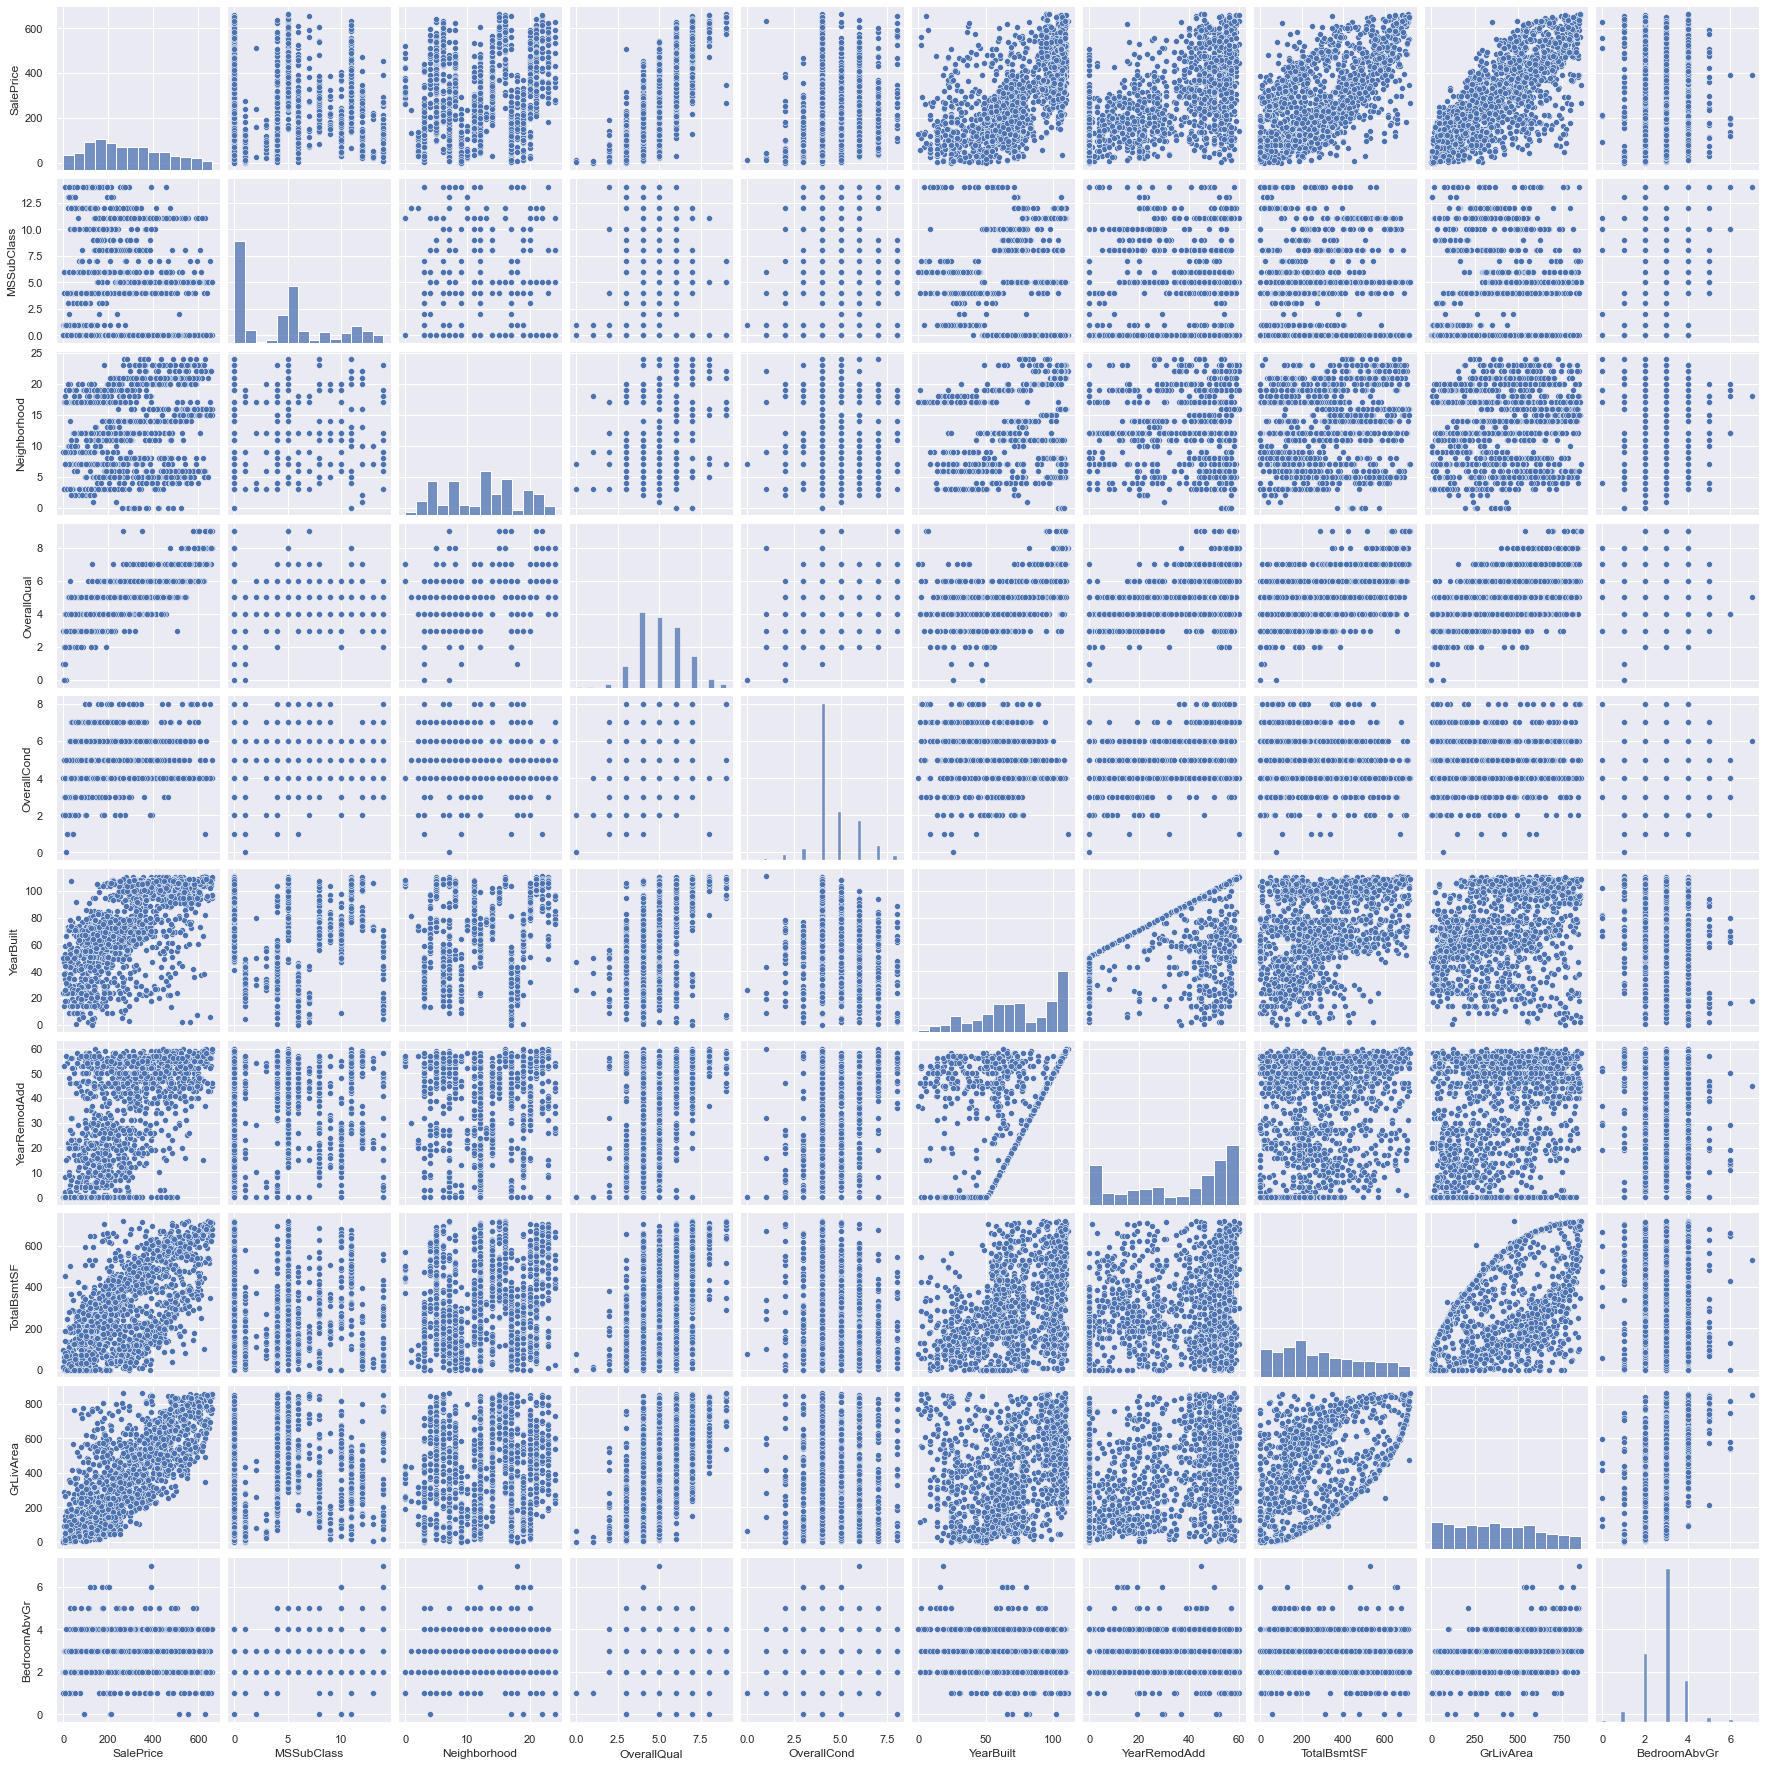

In [45]:
sns.set()
cols = ['SalePrice', 'MSSubClass', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr']
sns.pairplot(train_data[cols], size = 2.5)
plt.show()

### In the figures, we could see the linear relations between 'SalePrice', 'TotalBsmtSF' and, 'GrLiveArea'.

### Next, see what is missing: the missing data.

# 3 Feature Engineering
### In order not to waste any information, I dealed with missing values to better the estimation.
### It is important that how to fill up the missing data. Is missing data random or in a pattern? Moreover, we have to aovid being biased or losing the truth while processing the missing data.



In [105]:
train_df = train_data[['SalePrice', 'MSSubClass', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr']]
total = train_df.isnull().sum()
percent = (train_df.isnull().sum()/((train_df.isnull().count()))*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
SalePrice         0      0.0
MSSubClass        0      0.0
Neighborhood      0      0.0
OverallQual       0      0.0
OverallCond       0      0.0
YearBuilt         0      0.0
YearRemodAdd      0      0.0
TotalBsmtSF       0      0.0
GrLivArea         0      0.0
BedroomAbvGr      0      0.0

### It looks that there is no missing data in the selected features. So I tried to build models next.

# 4 Building models
### (1) Converting date type into numeric for training and testing data. 

In [106]:
for col in ['MSSubClass', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr']:
    test_data[col] = test_data[col].astype('category').cat.codes
test_df = test_data [['MSSubClass', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr']]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MSSubClass    1459 non-null   int8 
 1   Neighborhood  1459 non-null   int8 
 2   OverallQual   1459 non-null   int8 
 3   OverallCond   1459 non-null   int8 
 4   YearBuilt     1459 non-null   int8 
 5   YearRemodAdd  1459 non-null   int8 
 6   TotalBsmtSF   1459 non-null   int16
 7   GrLivArea     1459 non-null   int16
 8   BedroomAbvGr  1459 non-null   int8 
dtypes: int16(2), int8(7)
memory usage: 15.8 KB


In [107]:
test_df.isnull().sum()

MSSubClass      0
Neighborhood    0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
BedroomAbvGr    0
dtype: int64

### (2)Train Test Split 
### First splitted up the data into an X array that contains the features to train on, and a y array with the target variable, in this case the SalePrice column.

In [108]:
cols = ['MSSubClass', 'Neighborhood', 'OverallQual', 'OverallCond', 
        'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 
        'BedroomAbvGr']
X = train_df[cols].values

y = train_df['SalePrice'].values
X_scaled = preprocessing.StandardScaler().fit_transform(X)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=42)

### (3)Creating and Training the Model

###  a. Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

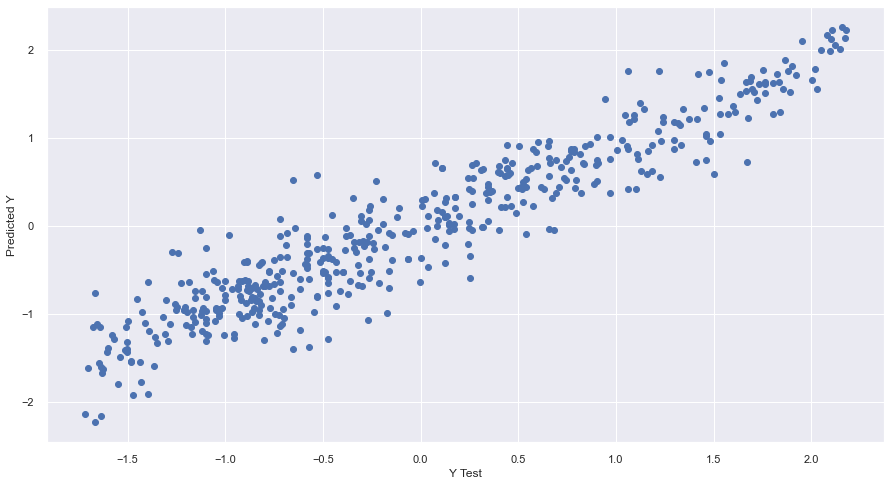

In [51]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

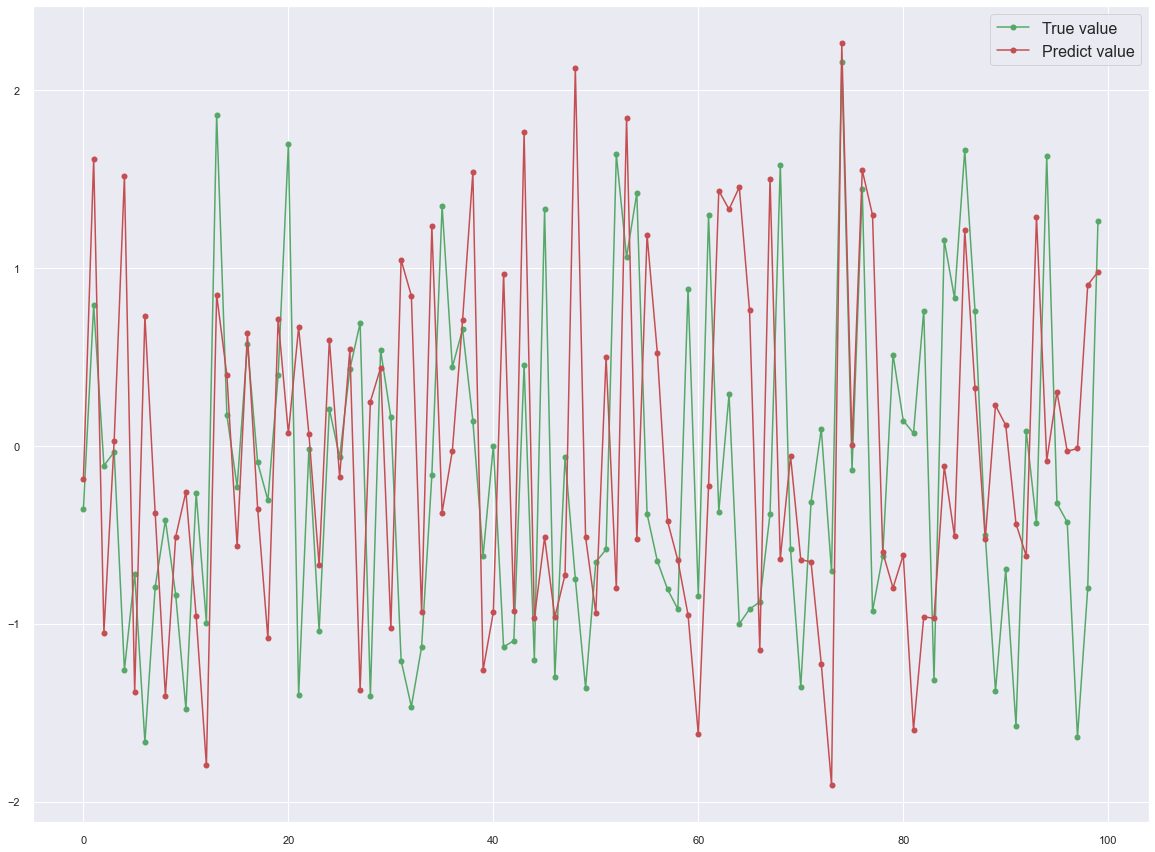

In [90]:
plt.figure(figsize = (20,15))
plt.plot(np.arange(100), y_test[:100], "go-", label="True value")
plt.plot(np.arange(100), predictions[:100], "ro-", label="Predict value")
plt.legend(loc="best",prop={"size":16})
plt.show()

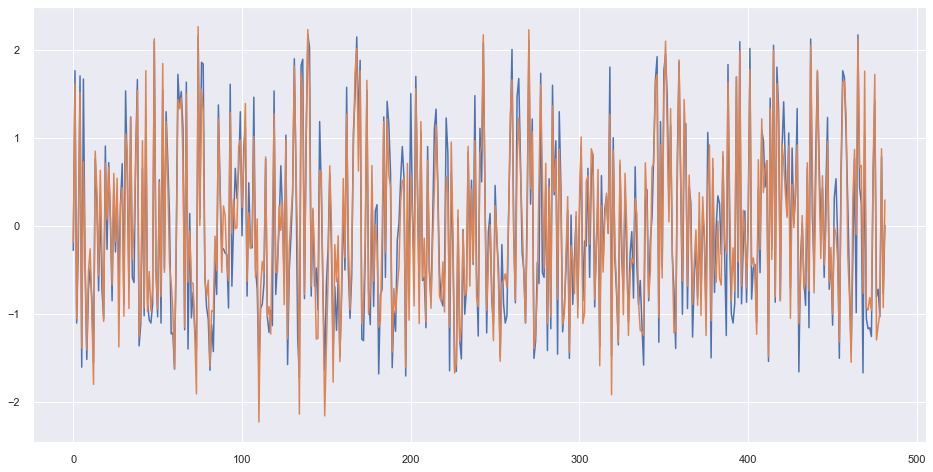

In [52]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [163]:
from sklearn import metrics
print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

MAE: 0.2592078668738743
MSE: 0.11159041215200381
RMSE: 0.3340515112254453


### b. Decision Tree Regression

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

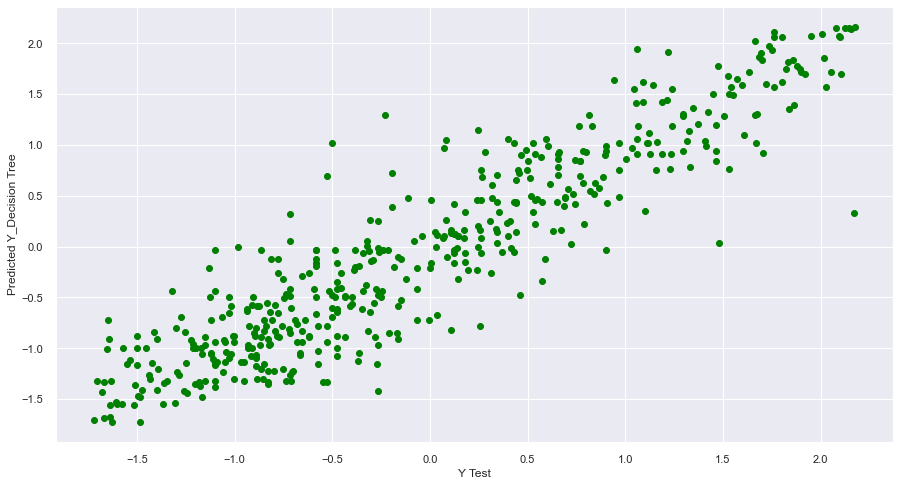

In [54]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y_Decision Tree')
plt.show()

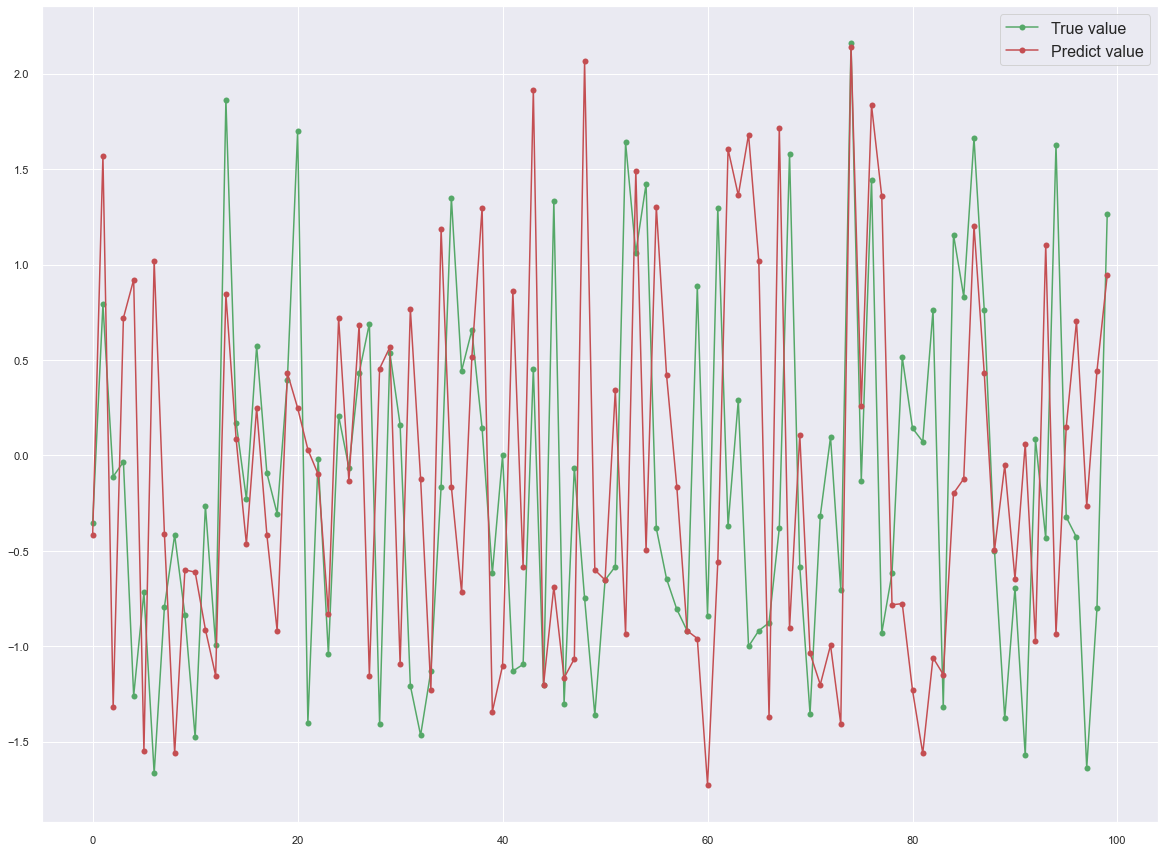

In [91]:
plt.figure(figsize = (20,15))
plt.plot(np.arange(100), y_test[:100], "go-", label="True value")
plt.plot(np.arange(100), dtr_pred[:100], "ro-", label="Predict value")
plt.legend(loc="best",prop={"size":16})
plt.show()

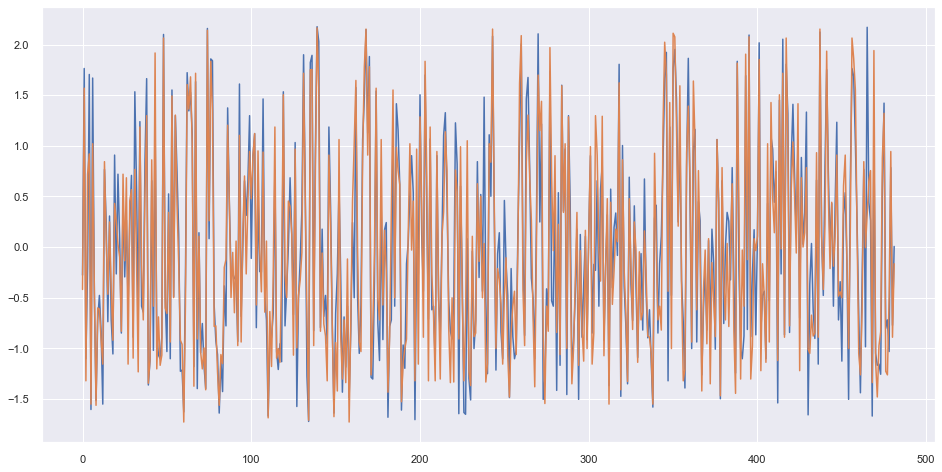

In [55]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(dtr_pred, label = 'predict_Decision Tree')
plt.show()

In [56]:
print(f'MAE: {metrics.mean_absolute_error(y_test, dtr_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, dtr_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, dtr_pred))}')

MAE: 0.2977131972222805
MSE: 0.15923137535853757
RMSE: 0.39903806254358437


### c. Support Vector Machine Regression

In [57]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

/Users/luckyhu/miniforge3/envs/my-conda-env/lib/python3.10/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


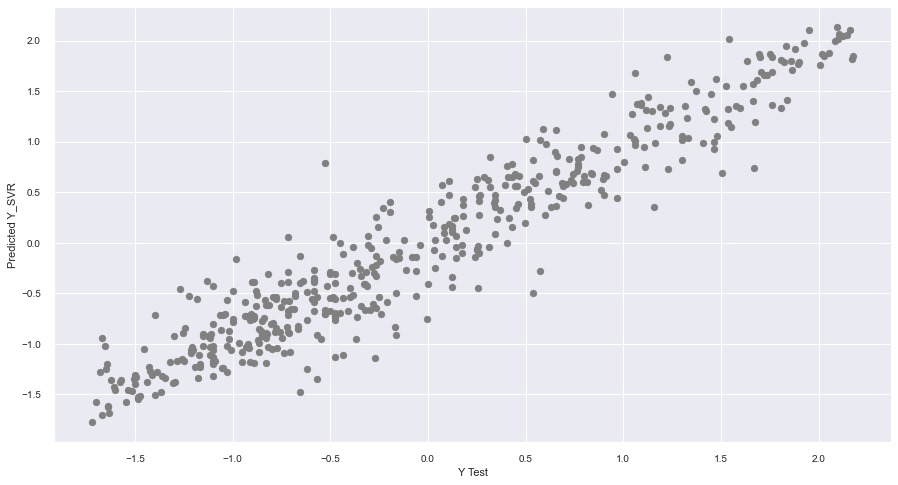

In [176]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='gray')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y_SVR')
plt.show()

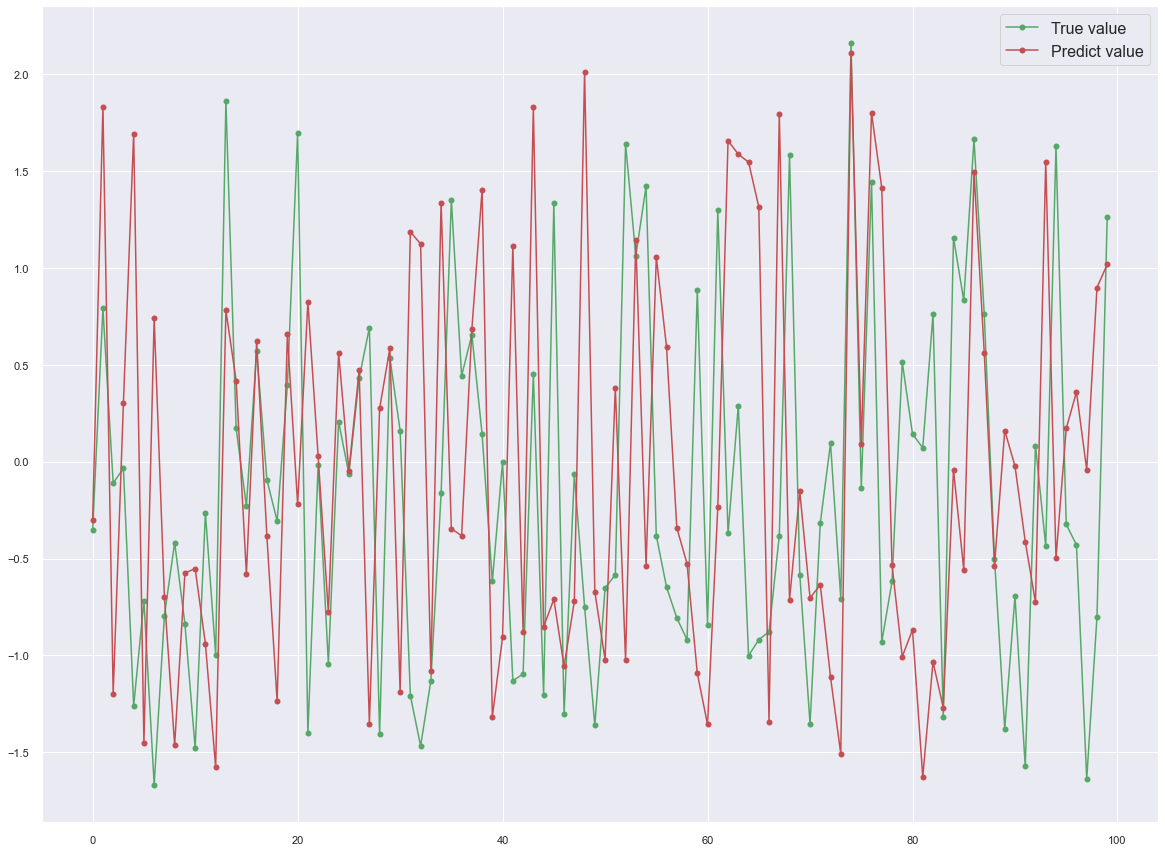

In [92]:
plt.figure(figsize = (20,15))
plt.plot(np.arange(100), y_test[:100], "go-", label="True value")
plt.plot(np.arange(100), svr_pred[:100], "ro-", label="Predict value")
plt.legend(loc="best",prop={"size":16})
plt.show()

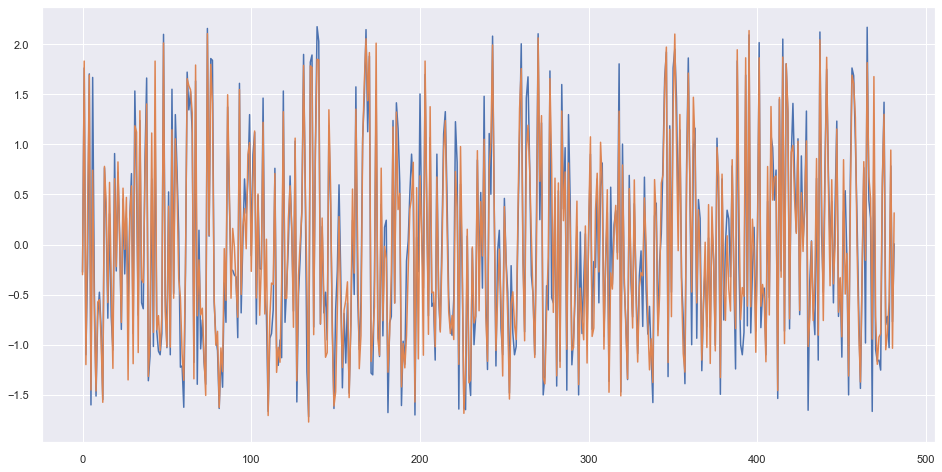

In [58]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(svr_pred, label = 'predict_SVR')
plt.show()

In [59]:
print(f'MAE: {metrics.mean_absolute_error(y_test, svr_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, svr_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, svr_pred))}')

MAE: 0.22626708755877006
MSE: 0.08918373989337308
RMSE: 0.29863646778880354


### d. Random Forest Regression 

In [110]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

/var/folders/bh/t8_dpm0n3d7d59v6ry1wl0p40000gn/T/ipykernel_45046/1027229657.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


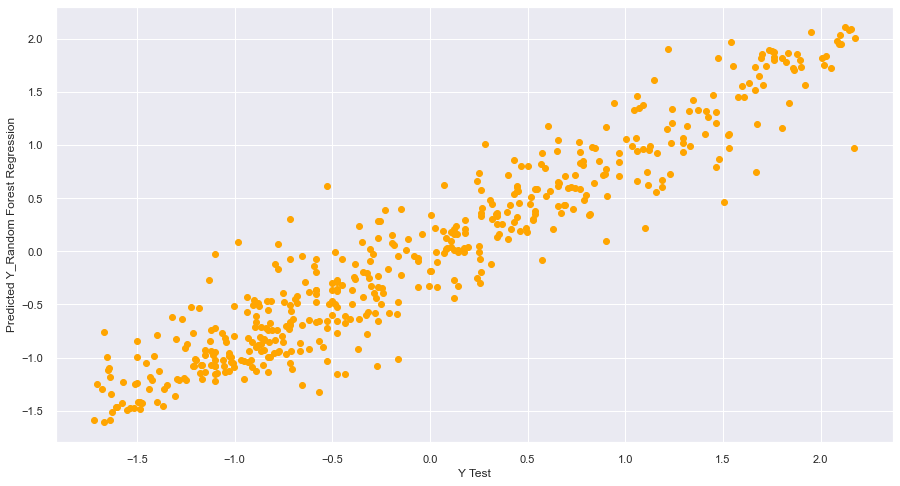

In [111]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y_Random Forest Regression')
plt.show()

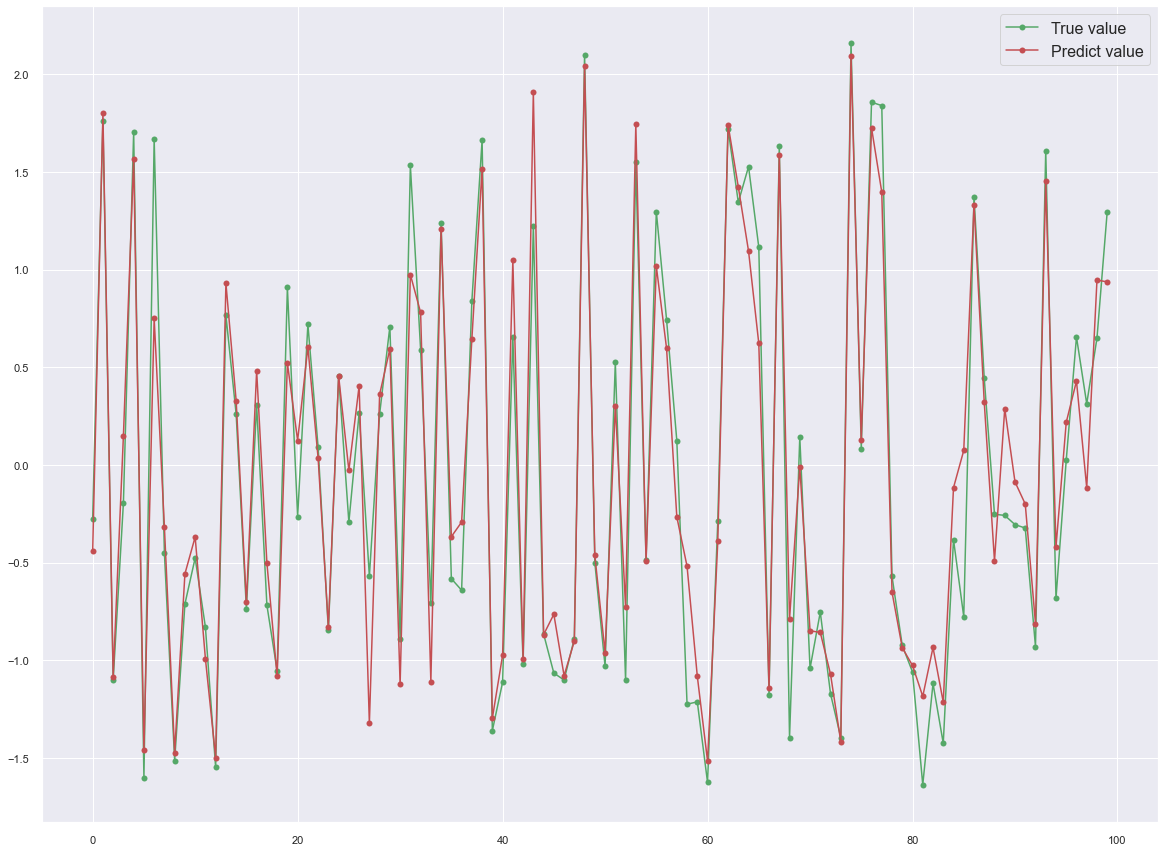

In [113]:

plt.figure(figsize = (20,15))
plt.plot(np.arange(100), y_test[:100], "go-", label="True value")
plt.plot(np.arange(100), rfr_pred[:100], "ro-", label="Predict value")

plt.legend(loc="best",prop={"size":16})
plt.show()


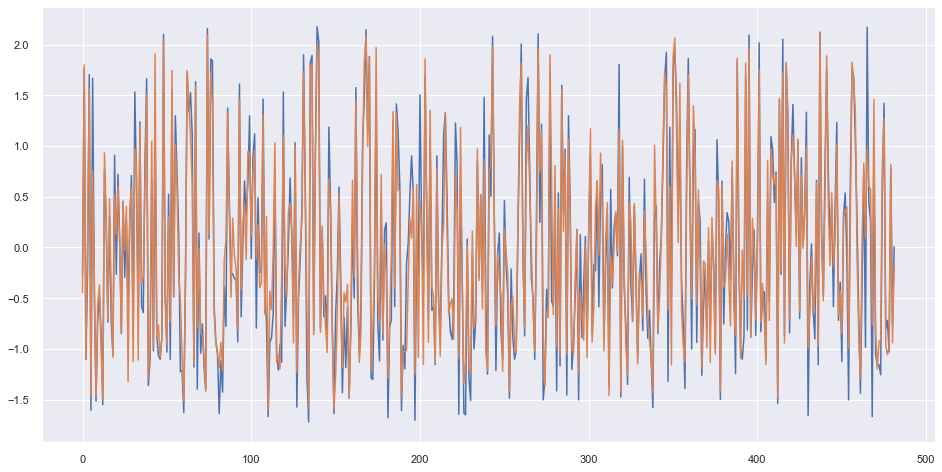

In [62]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(rfr_pred, label = 'predict_Random Forest Regression')
plt.show()

In [63]:
print(f'MAE: {metrics.mean_absolute_error(y_test, rfr_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, rfr_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, rfr_pred))}')

MAE: 0.23723220970467684
MSE: 0.10240974806272764
RMSE: 0.32001523098553863


# 5 Model Comparison
### Looked at the RMSE to compare the models.

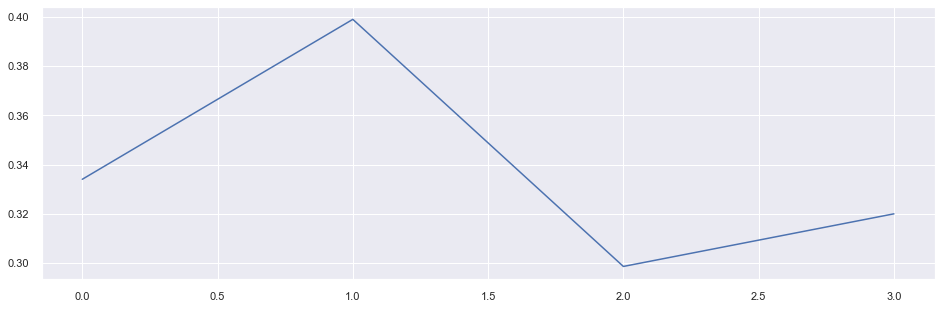

In [64]:
#models = ["Linear Regression", "Decision Tree Regression", "Support Vector Machine Regression", "Random Forest Regression"]
error_rate=np.array([np.sqrt(metrics.mean_squared_error(y_test, predictions)), np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)), np.sqrt(metrics.mean_squared_error(y_test, svr_pred)), np.sqrt(metrics.mean_squared_error(y_test, rfr_pred))])
plt.figure(figsize=(16,5))
plt.plot(error_rate)